In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} plotly

In [4]:
!conda install --yes --prefix {sys.prefix} lightgbm

Solving environment: done

## Package Plan ##

  environment location: /Users/mahsa/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lightgbm-2.3.0             |   py37h0a44026_0         682 KB
    llvm-openmp-4.0.1          |       hcfea43d_1         454 KB
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  lightgbm           pkgs/main/osx-64::lightgbm-2.3.0-py37h0a44026_0
  llvm-openmp        pkgs/main/osx-64::llvm-openmp-4.0.1-hcfea43d_1



llvm-openmp-4.0.1    | 454 KB    | ##################################### | 100% 
lightgbm-2.3.0       | 682 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [9]:
!conda install --yes --prefix {sys.prefix} joblib

Solving environment: done

## Package Plan ##

  environment location: /Users/mahsa/anaconda3

  added / updated specs:
    - joblib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-0.14.1              |             py_0         202 KB
    ------------------------------------------------------------
                                           Total:         202 KB

The following NEW packages will be INSTALLED:

  joblib             pkgs/main/noarch::joblib-0.14.1-py_0



joblib-0.14.1        | 202 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [17]:
# Librarys

import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn import model_selection, preprocessing, metrics
from sklearn.model_selection import train_test_split
import lightgbm as lgbm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.preprocessing import StandardScaler
#import xgboost as xgb
import joblib

from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import (LinearRegression, Ridge, Lasso,ElasticNet)

# EDA

In [18]:
#Load train and test dataset
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head(5)

,property,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5467900070,20140502,342000.0,3,2.00,1930,11947,1.0,0,0,...,8,1930,0,1966,0,98042,47.3672,-122.151,2200,12825
1,7197300105,20140502,550000.0,4,2.50,1940,10500,1.0,0,0,...,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500
2,7525100520,20140502,335000.0,2,2.00,1350,2560,1.0,0,0,...,8,1350,0,1976,0,98052,47.6344,-122.107,1790,2560
3,2591720070,20140502,482000.0,4,2.50,2710,35868,2.0,0,0,...,9,2710,0,1989,0,98038,47.3750,-122.022,2780,36224
4,7739100015,20140502,463000.0,3,1.75,1710,7320,1.0,0,0,...,7,1710,0,1948,0,98155,47.7512,-122.281,2260,8839


In [19]:
#delete property
df = df.drop(['property'], axis = 1)
df_test = df_test.drop(['property'], axis = 1)


#keep year and month of selling date
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df_test['date'] = pd.to_datetime(df_test['date'].astype(str), format='%Y%m%d')
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month

#delete the old date column
df = df.drop(['date'], axis = 1)
df_test = df_test.drop(['date'], axis = 1)

df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,342000.0,3,2.00,1930,11947,1.0,0,0,4,8,...,0,1966,0,98042,47.3672,-122.151,2200,12825,2014,5
1,550000.0,4,2.50,1940,10500,1.0,0,0,4,7,...,800,1976,0,98052,47.6830,-122.114,2200,10500,2014,5
2,335000.0,2,2.00,1350,2560,1.0,0,0,3,8,...,0,1976,0,98052,47.6344,-122.107,1790,2560,2014,5
3,482000.0,4,2.50,2710,35868,2.0,0,0,3,9,...,0,1989,0,98038,47.3750,-122.022,2780,36224,2014,5
4,463000.0,3,1.75,1710,7320,1.0,0,0,3,7,...,0,1948,0,98155,47.7512,-122.281,2260,8839,2014,5


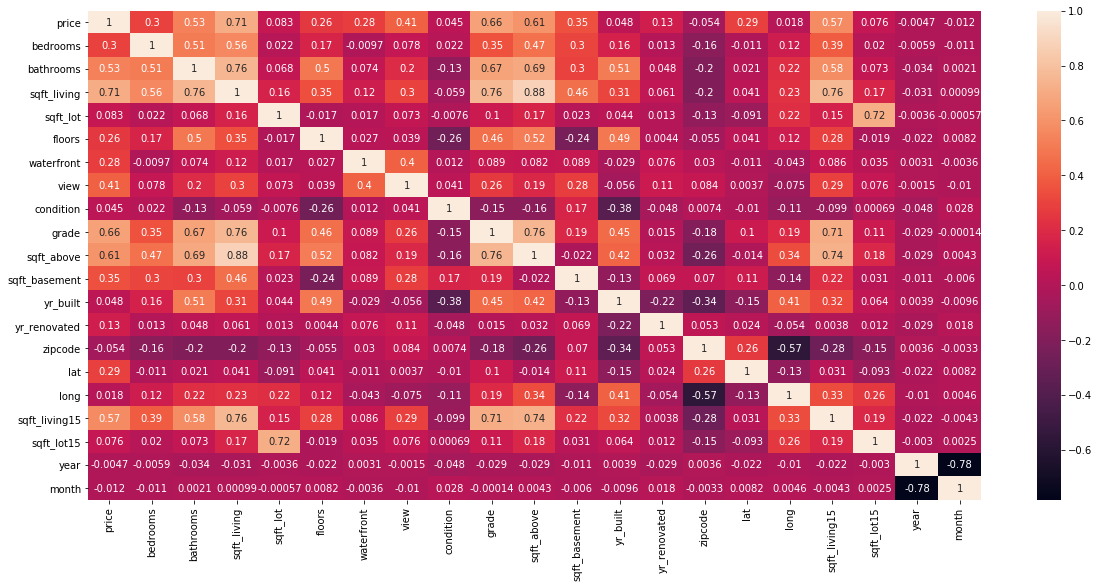

In [4]:
#Coralation plot
corr = df.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)
plt.savefig('../Final report and presentation/Figures/corr_plot.png')

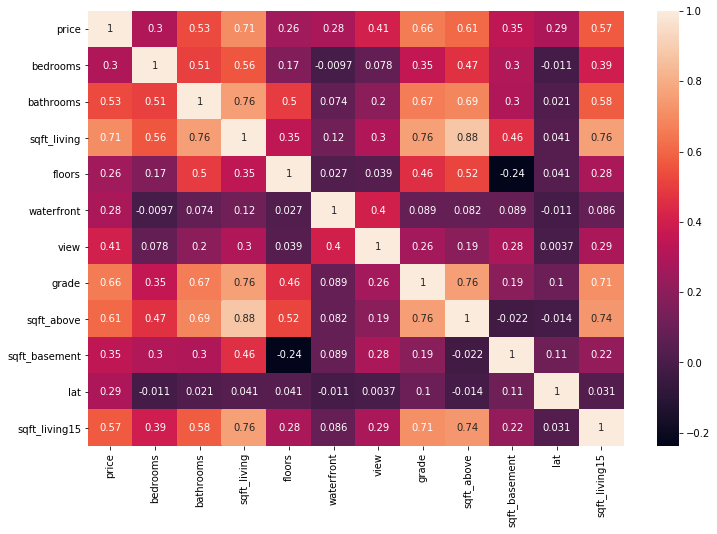

In [5]:
top_feature = corr.index[abs(corr['price'])>0.2]

plt.subplots(figsize=(12, 8))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)

plt.savefig('../Final report and presentation/Figures/corr_pruned_plot.png')
plt.show()

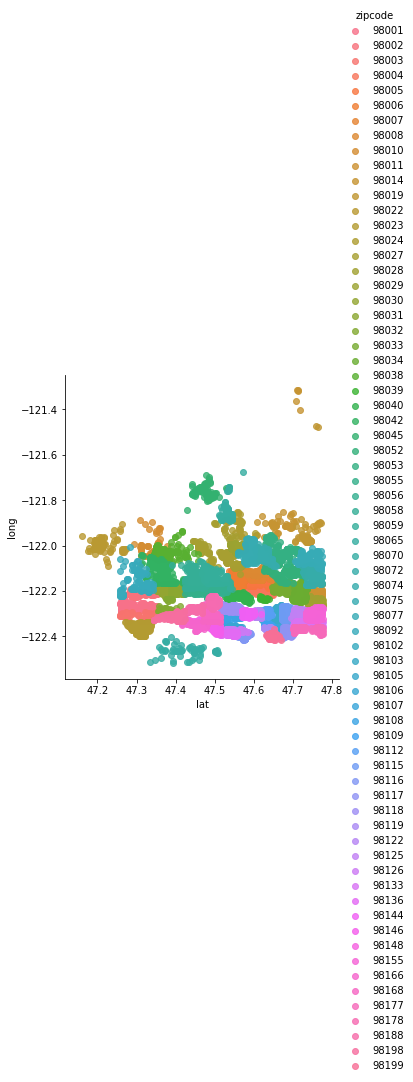

In [6]:
sns.lmplot('lat', 'long', data=df, hue='zipcode', fit_reg=False, legend=True)
plt.savefig('../Final report and presentation/Figures/lat-long-zipcode.png')


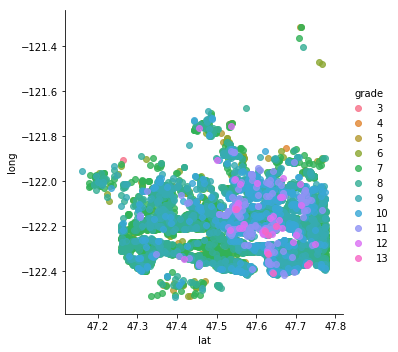

In [7]:
sns.lmplot('lat', 'long', data=df, hue='grade', fit_reg=False)
plt.savefig('../Final report and presentation/Figures/lat-long-grade.png')

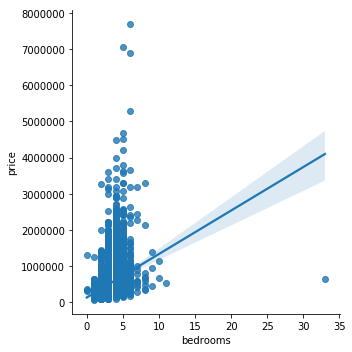

In [8]:
sns.lmplot(x='bedrooms',y='price',data=df)

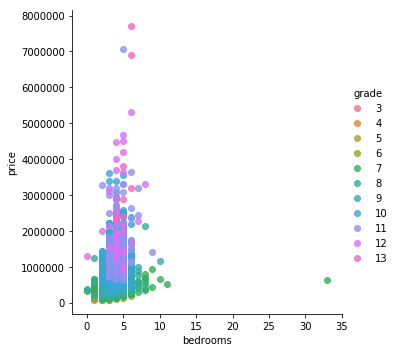

In [11]:
sns.lmplot(x='bedrooms',y='price',data=df,hue='grade',fit_reg=False)
plt.savefig('C:/Users/vahid/Box Sync/STAT 502-project/Codes/outlier1.png')

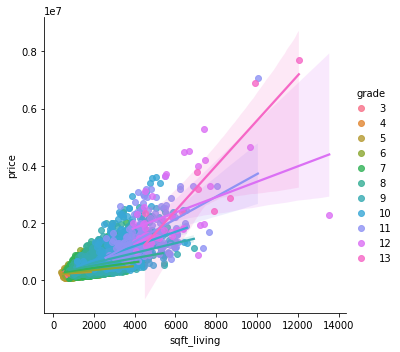

In [20]:
sns.lmplot(x='sqft_living',y='price',data=df,hue='grade')
plt.savefig('C:/Users/vahid/Box Sync/STAT 502-project/Codes/outlier2.png')

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
df['grade'].value_counts()

7     4160
8     2844
9     1177
6      932
10     527
11     177
5      120
12      42
4        9
13       8
3        3
Name: grade, dtype: int64

In [52]:
count_class_4 = 400
count_class_12 = 400
count_class_13 = 400
smt = SMOTE(k_neighbors=5,sampling_strategy={4:count_class_4, 12: count_class_12,13: count_class_13})
X_smt, y_smt = smt.fit_sample(df, df['grade'])

In [53]:
X_smt.shape

(11140, 22)

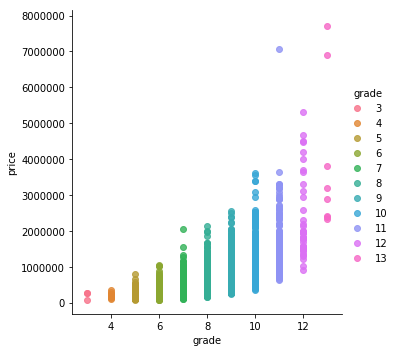

In [54]:
sns.lmplot(y='price',x='grade',data=df,hue='grade')

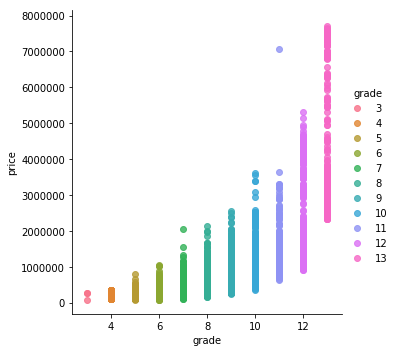

In [55]:
sns.lmplot(y='price',x='grade',data=X_smt,hue='grade')

In [30]:
df['grade'][1136]
df['price'][1136]

7060000.0

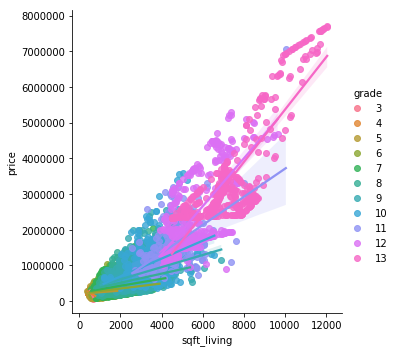

In [20]:
sns.lmplot(x='sqft_living',y='price',data=X_smt,hue='grade')

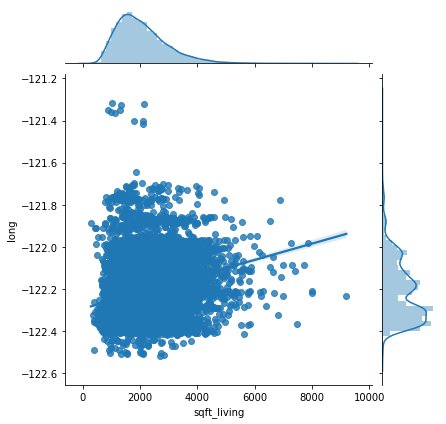

In [25]:
sns.jointplot(x='sqft_living',y='long',data=df_test,kind='reg')

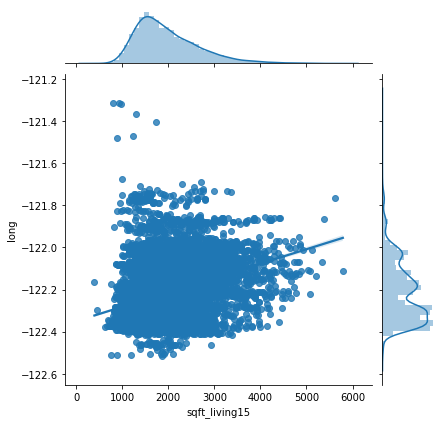

In [10]:
sns.jointplot(x='sqft_living15',y='long',data=df,kind='reg')

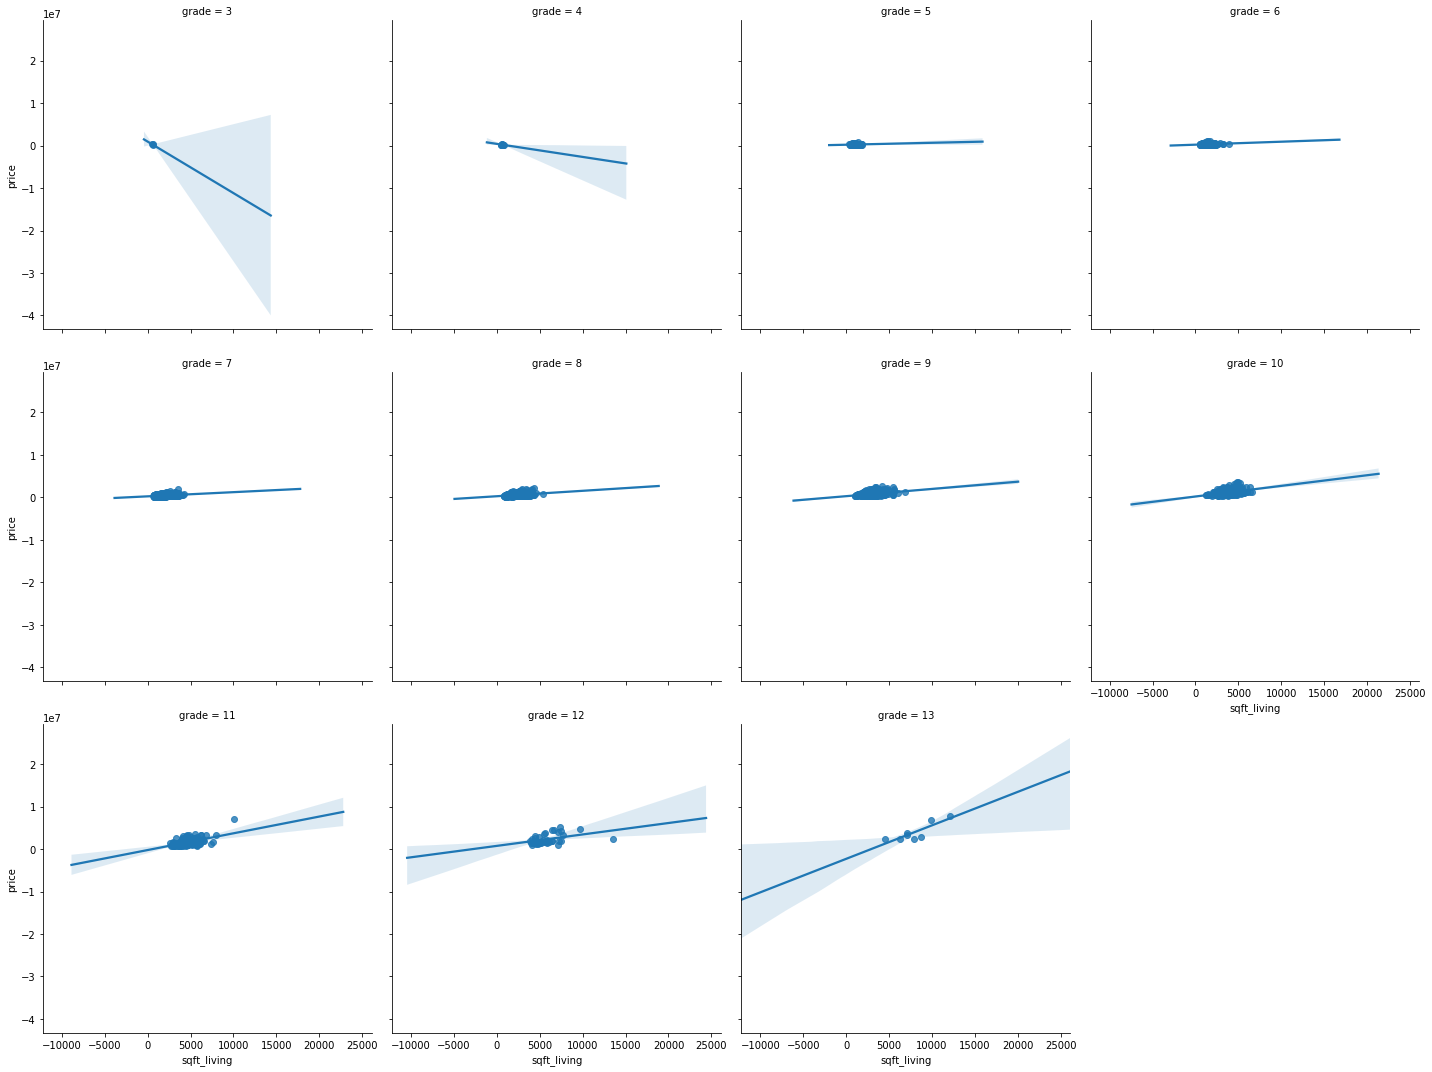

In [15]:
sns.lmplot(x='sqft_living',y='price',data=df,col='grade',col_wrap=4)
plt.savefig('../Final report and presentation/Figures/sq_living-price-grade.png')

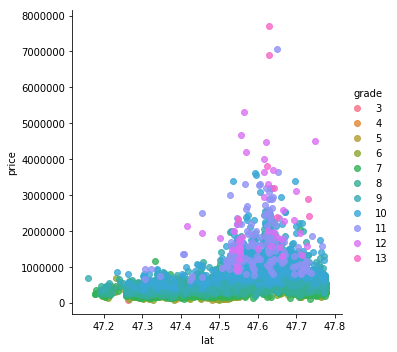

In [16]:

sns.lmplot(data=df,x='lat',y='price',hue='grade',fit_reg=False)
plt.savefig('../Final report and presentation/Figures/lat-price-grade.png')

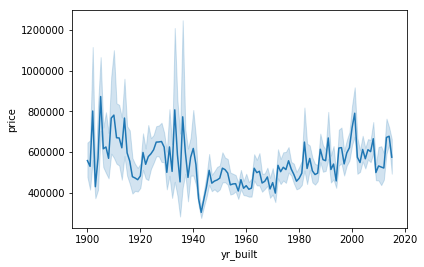

In [17]:
sns.lineplot(x='yr_built', y='price', data=df)
plt.savefig('../Final report and presentation/Figures/yr_built-price.png')

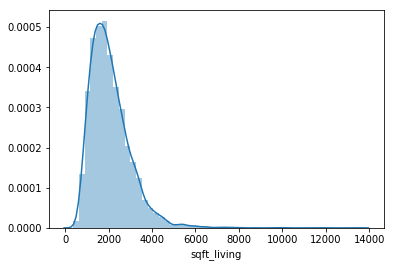

In [15]:
sns.distplot(df['sqft_living'])
plt.savefig('C:/Users/vahid/Box Sync/STAT 502-project/Codes/logtransform_1.png')

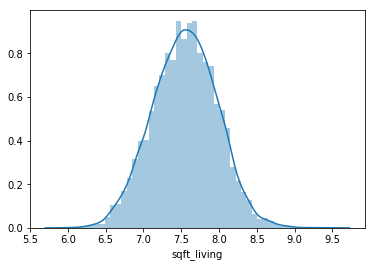

In [16]:
df['sqft_living']=np.log(1 + df['sqft_living'])

sns.distplot(df['sqft_living'])
plt.savefig('C:/Users/vahid/Box Sync/STAT 502-project/Codes/logtransform_2.png')